In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import InstanceHardnessThreshold

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
IHT = InstanceHardnessThreshold()

In [4]:
res.resample_directory(IHT, path, 'InstanceHardnessThreshold', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/InstanceHardnessThreshold/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/InstanceHardnessThreshold/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 2972 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 19)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 11s 68ms/step - loss: 0.2882 - tp: 4524.0000 - fp: 692.0000 - tn: 4516.0000 - fn: 684.0000 - accuracy: 0.8679 - precision: 0.8673 - recall: 0.8687 - auc: 0.9517 - val_loss: 0.7694 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7793
Epoch 2/20
163/163 [==============================] - 10s 59ms/step - loss: 0.0916 - tp: 5042.0000 - fp: 165.0000 - tn: 5043.0000 - fn: 166.0000 - accuracy: 0.9682 - precision: 0.9683 - recall: 0.9681 - auc: 0.9946 - val_loss: 0.6944 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8223
Epoch 3/20
163/163 [==============================] - 10s 59ms/step - loss: 0.0771 - tp: 5067.0000 - fp: 147.0000 - tn: 5065.0000 - fn: 145.0000 - accuracy: 0.9720 - precision: 0.9718 - recall: 0.9722 - auc: 0.

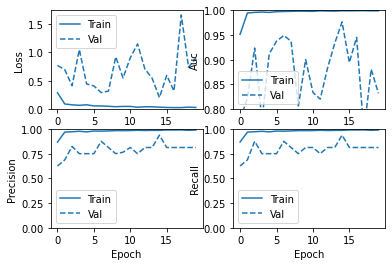

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.57      0.97      0.72       234
   PNEUMONIA       0.97      0.56      0.71       390

    accuracy                           0.71       624
   macro avg       0.77      0.77      0.71       624
weighted avg       0.82      0.71      0.71       624



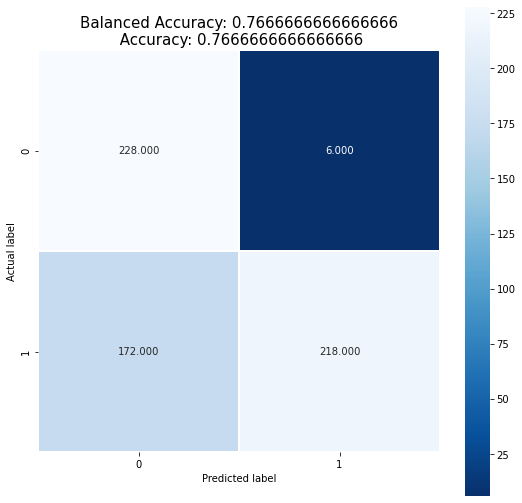

In [13]:
cnn.display_confusion_matrix(test_set)